In [57]:
# 核心資料處理套件
import pandas as pd
import numpy as np

# 資料視覺化套件
import matplotlib.pyplot as plt
import seaborn as sns

# 資料預處理與模型建構套件
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 設定圖形樣式
sns.set_style('whitegrid')
# 放在 Notebook 的第一個設定 cell
import matplotlib.pyplot as plt

# 載入資料集
try:
    data = pd.read_csv('creditcard.csv')
    print("資料載入成功！")
except FileNotFoundError:
    print("錯誤：找不到 'creditcard.csv' 檔案，請確認檔案路徑是否正確。")
    # 如果檔案真的不存在，程式會在此停止，並提醒你檢查檔案。

# 全域設定：中文字體 + 關閉 warnings
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  
plt.rcParams['axes.unicode_minus'] = False

資料載入成功！


前 5 筆資料：
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27  

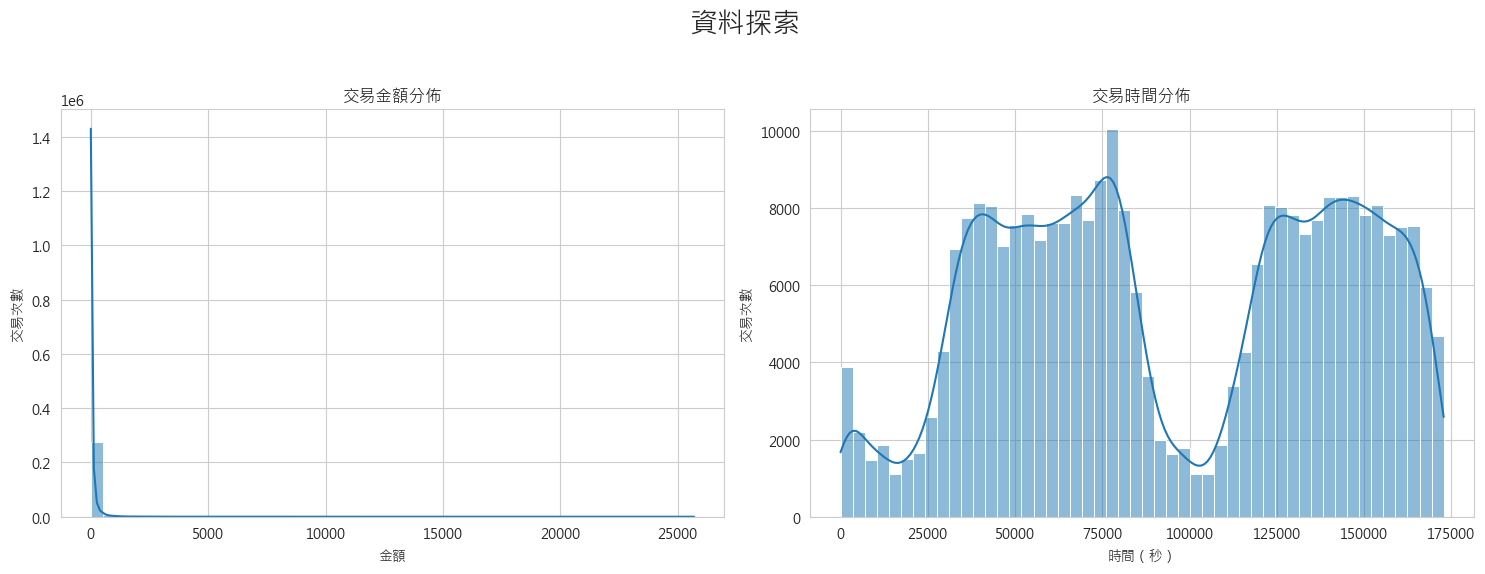

In [58]:
# 顯示前 5 筆資料，確認格式正確
print("前 5 筆資料：")
print(data.head())

# 顯示資料的基本資訊，檢查欄位型態與是否有遺失值
print("\n資料基本資訊：")
data.info()

# 檢查目標變數 'Class' 的分佈
# 'Class' = 0 代表正常交易, 'Class' = 1 代表詐欺交易
print("\n'Class' 類別分佈：")
print(data['Class'].value_counts())
print(f"詐欺交易佔總交易數的比例：{round(data['Class'].value_counts()[1]/len(data) * 100, 2)}%")

# 資料視覺化：交易金額與時間的分佈
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
sns.histplot(data['Amount'], bins=50, ax=ax1, kde=True)
ax1.set_title('交易金額分佈')
ax1.set_xlabel('金額')
ax1.set_ylabel('交易次數')

sns.histplot(data['Time'], bins=50, ax=ax2, kde=True)
ax2.set_title('交易時間分佈')
ax2.set_xlabel('時間（秒）')
ax2.set_ylabel('交易次數')

plt.suptitle("資料探索", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [59]:
# 特徵工程：標準化 Time 和 Amount
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# 捨棄原始 Time 和 Amount
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# 準備特徵（X）與目標（y）
X = data.drop('Class', axis=1)
y = data['Class']

# 分割資料集：80% 訓練集，20% 測試集
# 使用 stratify=y 確保訓練集和測試集的詐欺比例一致
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("訓練集特徵大小：", X_train.shape)
print("測試集特徵大小：", X_test.shape)

訓練集特徵大小： (227845, 30)
測試集特徵大小： (56962, 30)



開始訓練模型...
模型訓練完成！
--- 過採樣前：羅吉斯迴歸特徵重要性 (迴歸係數) ---

過採樣前，模型最重要的特徵：
          feature  coefficient  abs_coefficient
9             V10    -0.778540         0.778540
26            V27    -0.732719         0.732719
3              V4     0.699480         0.699480
13            V14    -0.568532         0.568532
21            V22     0.557363         0.557363
19            V20    -0.470524         0.470524
12            V13    -0.431262         0.431262
20            V21     0.354882         0.354882
8              V9    -0.280513         0.280513
15            V16    -0.273284         0.273284
28  scaled_amount     0.229387         0.229387
27            V28    -0.223088         0.223088
7              V8    -0.149036         0.149036
4              V5     0.146725         0.146725
11            V12     0.142692         0.142692


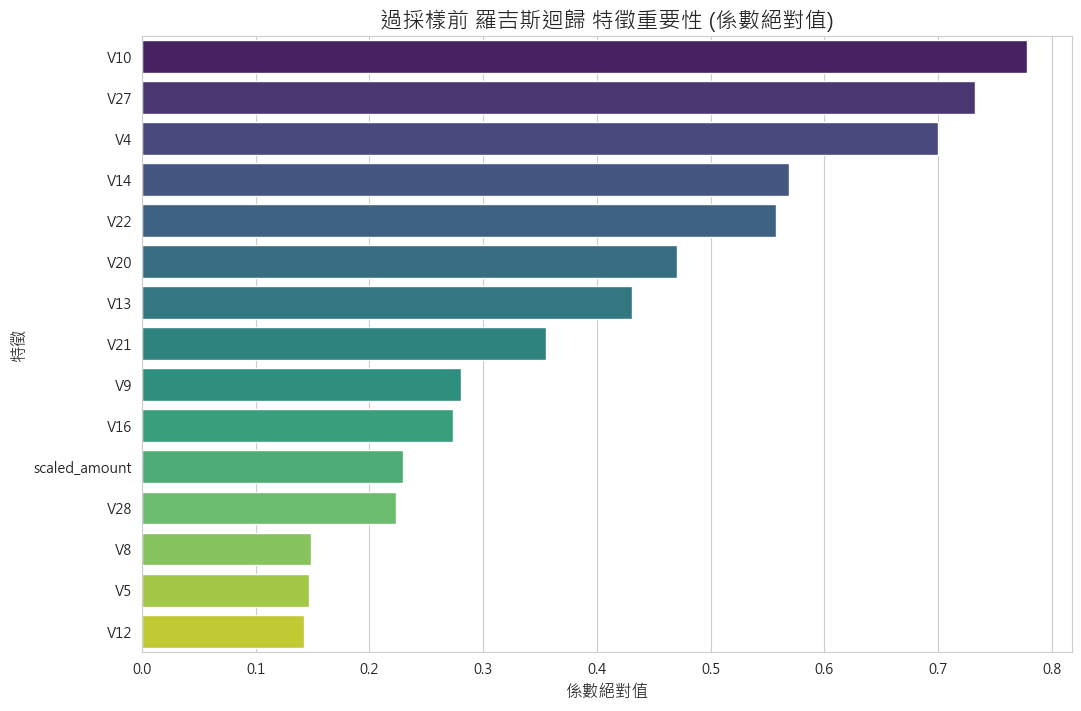

In [75]:
# 建立羅吉斯迴歸模型
model = LogisticRegression(solver='liblinear')

# 訓練模型
print("\n開始訓練模型...")
model.fit(X_train, y_train)
print("模型訓練完成！")

print("--- 過採樣前：羅吉斯迴歸特徵重要性 (迴歸係數) ---")
# 獲取係數
coefficients_pre = model.coef_[0]
feature_names = X_train.columns
importance_df_pre = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients_pre,
    'abs_coefficient': np.abs(coefficients_pre)
})

# 根據絕對值排序
importance_df_pre = importance_df_pre.sort_values(by='abs_coefficient', ascending=False)
print("\n過採樣前，模型最重要的特徵：")
print(importance_df_pre.head(15))

# 視覺化特徵重要性
plt.figure(figsize=(12, 8))
sns.barplot(x='abs_coefficient', y='feature', data=importance_df_pre.head(15), palette='viridis')
plt.title('過採樣前 羅吉斯迴歸 特徵重要性 (係數絕對值)', fontsize=16)
plt.xlabel('係數絕對值', fontsize=12)
plt.ylabel('特徵', fontsize=12)
plt.show()


混淆矩陣：
[[56851    13]
 [   35    63]]

準確率 (Accuracy): 0.9992
精確率 (Precision): 0.8289
召回率 (Recall): 0.6429
F1 Score: 0.7241
ROC AUC Score: 0.9575


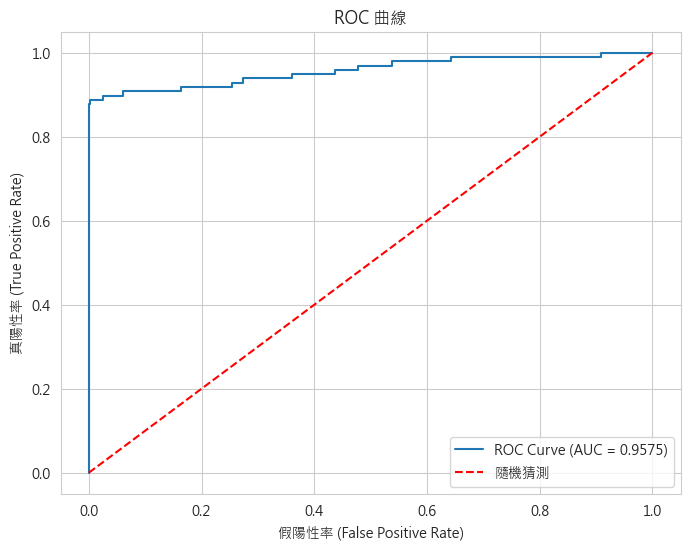

In [61]:
# 在測試集上進行預測
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n混淆矩陣：")
print(conf_matrix)

# 計算各項評估指標
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\n準確率 (Accuracy): {acc:.4f}")
print(f"精確率 (Precision): {prec:.4f}")
print(f"召回率 (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# 視覺化 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='隨機猜測')
plt.xlabel('假陽性率 (False Positive Rate)')
plt.ylabel('真陽性率 (True Positive Rate)')
plt.title('ROC 曲線')
plt.legend()
plt.show()

In [62]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



訓練集過採樣前，類別分佈：
Class
0    227451
1       394
Name: count, dtype: int64

訓練集過採樣後，類別分佈：
Class
0    227451
1    227451
Name: count, dtype: int64

用過採樣資料訓練羅吉斯迴歸模型...

--- 過採樣後：羅吉斯迴歸特徵重要性 (迴歸係數) ---

過採樣後，模型最重要的特徵：
          feature  coefficient  abs_coefficient
28  scaled_amount     2.441717         2.441717
13            V14    -1.726973         1.726973
9             V10    -1.605820         1.605820
19            V20    -1.390688         1.390688
16            V17    -1.378924         1.378924
15            V16    -1.287737         1.287737
11            V12    -1.097805         1.097805
3              V4     1.095106         1.095106
27            V28     1.049950         1.049950
4              V5     0.995103         0.995103
0              V1     0.961244         0.961244
21            V22     0.734576         0.734576
1              V2     0.607433         0.607433
6              V7    -0.597112         0.597112
8              V9    -0.592435         0.592435


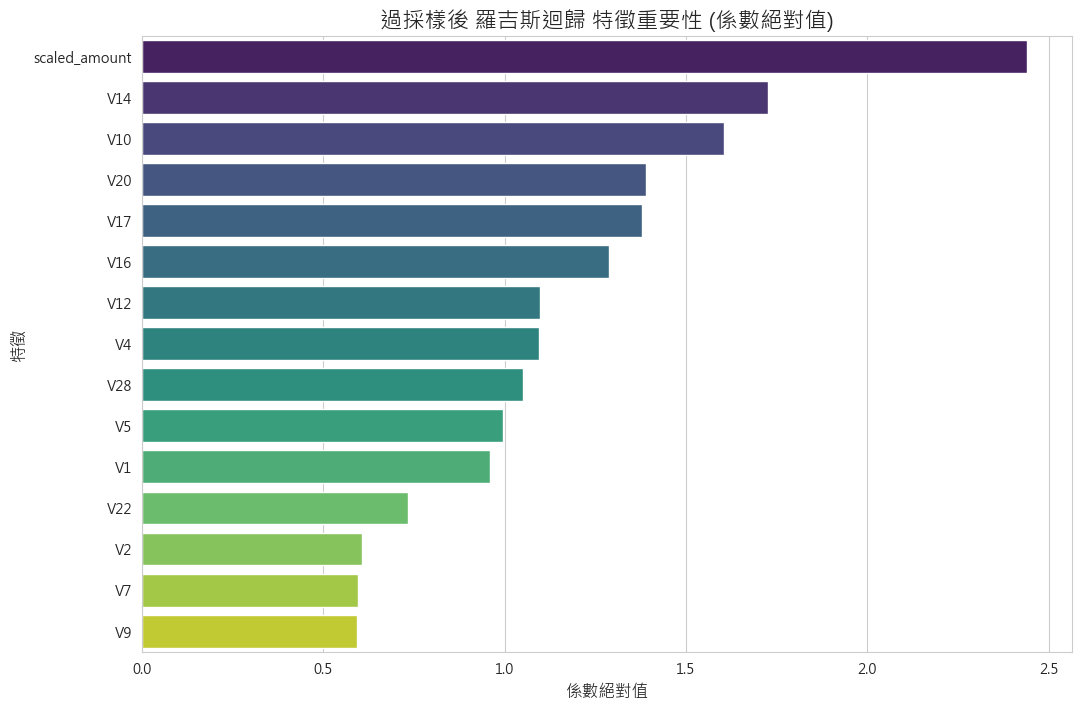


使用 SMOTE 後的羅吉斯迴歸模型評估結果：
召回率 (Recall): 0.9184
精確率 (Precision): 0.0580
F1 Score: 0.1092
混淆矩陣：
 [[55403  1461]
 [    8    90]]


In [77]:
# 核心資料處理套件
import pandas as pd
import numpy as np

# 資料視覺化套件
import matplotlib.pyplot as plt
import seaborn as sns

# 資料預處理與模型建構套件
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 處理類別不平衡套件
from imblearn.over_sampling import SMOTE

# 設定圖形樣式
sns.set_style('whitegrid')

# 全域設定：中文字體 + 關閉 warnings
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  
plt.rcParams['axes.unicode_minus'] = False

# 載入資料 (這部分與之前相同)
data = pd.read_csv('creditcard.csv')
data['scaled_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)

X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 開始 SMOTE 過採樣
print("\n訓練集過採樣前，類別分佈：")
print(y_train.value_counts())

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\n訓練集過採樣後，類別分佈：")
print(y_train_res.value_counts())

# 用新的過採樣訓練集重新訓練羅吉斯迴歸模型
print("\n用過採樣資料訓練羅吉斯迴歸模型...")
model_lr_smote = LogisticRegression(solver='liblinear')
model_lr_smote.fit(X_train_res, y_train_res)

print("\n--- 過採樣後：羅吉斯迴歸特徵重要性 (迴歸係數) ---")
# 獲取係數
coefficients_post = model_lr_smote.coef_[0]
importance_df_post = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients_post,
    'abs_coefficient': np.abs(coefficients_post)
})

# 根據絕對值排序
importance_df_post = importance_df_post.sort_values(by='abs_coefficient', ascending=False)
print("\n過採樣後，模型最重要的特徵：")
print(importance_df_post.head(15))

# 視覺化特徵重要性
plt.figure(figsize=(12, 8))
sns.barplot(x='abs_coefficient', y='feature', data=importance_df_post.head(15), palette='viridis')
plt.title('過採樣後 羅吉斯迴歸 特徵重要性 (係數絕對值)', fontsize=16)
plt.xlabel('係數絕對值', fontsize=12)
plt.ylabel('特徵', fontsize=12)
plt.show()

# 評估模型
y_pred_lr_smote = model_lr_smote.predict(X_test)
print("\n使用 SMOTE 後的羅吉斯迴歸模型評估結果：")
print(f"召回率 (Recall): {recall_score(y_test, y_pred_lr_smote):.4f}")
print(f"精確率 (Precision): {precision_score(y_test, y_pred_lr_smote):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr_smote):.4f}")
print("混淆矩陣：\n", confusion_matrix(y_test, y_pred_lr_smote))

In [ ]:
# !pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
# 載入 XGBoost 套件
import xgboost as xgb

# 選擇模型：XGBoost
print("\n開始訓練 XGBoost 模型...")
# 使用SMOTE過採樣後的訓練集
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train_res, y_train_res)

# 評估模型
y_pred_xgb = model_xgb.predict(X_test)
print("\n使用 SMOTE 與 XGBoost 模型評估結果：")
print(f"召回率 (Recall): {recall_score(y_test, y_pred_xgb):.4f}")
print(f"精確率 (Precision): {precision_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print("混淆矩陣：\n", confusion_matrix(y_test, y_pred_xgb))


開始訓練 XGBoost 模型...

使用 SMOTE 與 XGBoost 模型評估結果：
召回率 (Recall): 0.8878
精確率 (Precision): 0.7311
F1 Score: 0.8018
混淆矩陣：
 [[56832    32]
 [   11    87]]


--- 網格搜索前：XGBoost 特徵重要性 ---

網格搜索前，模型最重要的前 15 個特徵：
          feature  importance
13            V14    0.590279
3              V4    0.058682
11            V12    0.034450
7              V8    0.032702
0              V1    0.016864
12            V13    0.016409
2              V3    0.015822
16            V17    0.014940
25            V26    0.014491
17            V18    0.014321
9             V10    0.014111
6              V7    0.013353
28  scaled_amount    0.013114
10            V11    0.012767
29    scaled_time    0.011563


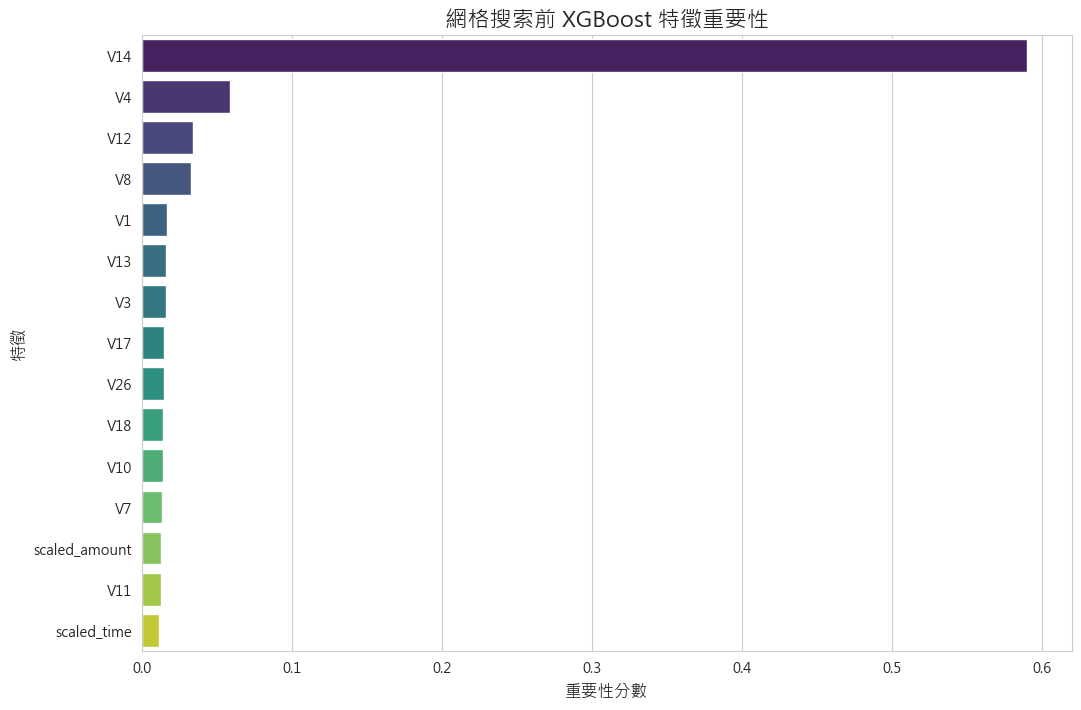

In [71]:
# 載入 XGBoost 模型 (使用步驟二訓練的 model_xgb)
import xgboost as xgb

# 假設你已經運行了之前的程式碼，並得到了 model_xgb
# 如果沒有，請先運行這段程式碼：
# model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# model_xgb.fit(X_train_res, y_train_res)

print("--- 網格搜索前：XGBoost 特徵重要性 ---")

# 獲取特徵重要性
feature_importances_pre = model_xgb.feature_importances_
feature_names = X_train.columns
importance_df_pre = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_pre})

# 根據重要性排序，並顯示前 15 個特徵
importance_df_pre = importance_df_pre.sort_values(by='importance', ascending=False).head(15)

print("\n網格搜索前，模型最重要的前 15 個特徵：")
print(importance_df_pre)

# 視覺化特徵重要性
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df_pre, palette='viridis')
plt.title('網格搜索前 XGBoost 特徵重要性', fontsize=16)
plt.xlabel('重要性分數', fontsize=12)
plt.ylabel('特徵', fontsize=12)
plt.show()

In [72]:
# 載入網格搜索套件
from sklearn.model_selection import GridSearchCV

# 設定參數範圍，這只是一個示範
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

# 建立 Grid Search 物件
print("\n開始進行 XGBoost 參數網格搜索...")
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='recall', # 我們主要優化召回率
    cv=3, # 使用 3-fold 交叉驗證
    verbose=1,
    n_jobs=-1 # 使用所有 CPU 核心
)

# 在過採樣後的訓練集上執行網格搜索
grid_search.fit(X_train_res, y_train_res)

# 顯示最佳參數與分數
print("\n網格搜索最佳參數：", grid_search.best_params_)
print("網格搜索最佳召回率：", grid_search.best_score_)

# 用最佳參數重新訓練最終模型
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

print("\n使用最佳參數的 XGBoost 最終模型評估結果：")
print(f"召回率 (Recall): {recall_score(y_test, y_pred_best_xgb):.4f}")
print(f"精確率 (Precision): {precision_score(y_test, y_pred_best_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_xgb):.4f}")
print("混淆矩陣：\n", confusion_matrix(y_test, y_pred_best_xgb))


開始進行 XGBoost 參數網格搜索...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

網格搜索最佳參數： {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
網格搜索最佳召回率： 1.0

使用最佳參數的 XGBoost 最終模型評估結果：
召回率 (Recall): 0.8673
精確率 (Precision): 0.7083
F1 Score: 0.7798
混淆矩陣：
 [[56829    35]
 [   13    85]]



--- 網格搜索後：XGBoost 特徵重要性 ---

網格搜索後，模型最重要的前 15 個特徵：
          feature  importance
13            V14    0.604934
3              V4    0.053775
11            V12    0.035381
7              V8    0.028151
12            V13    0.016929
17            V18    0.016105
25            V26    0.015880
0              V1    0.015115
9             V10    0.015098
28  scaled_amount    0.013312
2              V3    0.013302
29    scaled_time    0.012788
24            V25    0.012438
16            V17    0.011628
6              V7    0.011090


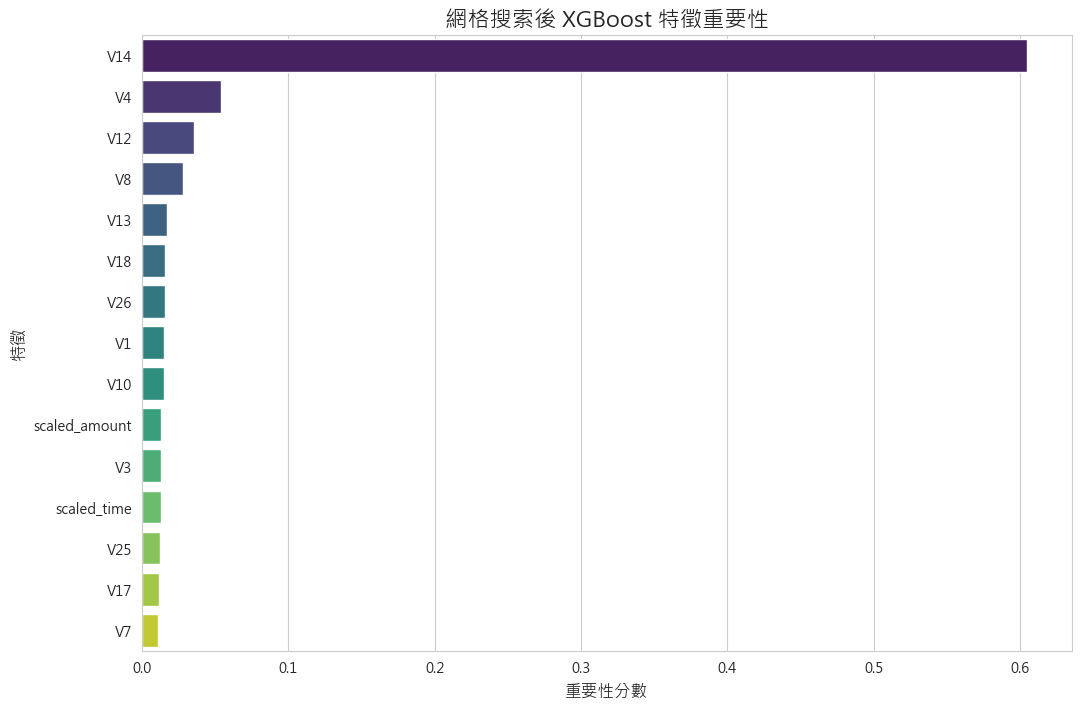

In [73]:
# 載入 XGBoost 模型 (使用步驟三訓練的 best_xgb_model)
# 假設你已經運行了之前的程式碼，並得到了 best_xgb_model
# best_xgb_model = grid_search.best_estimator_

print("\n--- 網格搜索後：XGBoost 特徵重要性 ---")

# 獲取特徵重要性
feature_importances_post = best_xgb_model.feature_importances_
feature_names = X_train.columns
importance_df_post = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_post})

# 根據重要性排序，並顯示前 15 個特徵
importance_df_post = importance_df_post.sort_values(by='importance', ascending=False).head(15)

print("\n網格搜索後，模型最重要的前 15 個特徵：")
print(importance_df_post)

# 視覺化特徵重要性
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df_post, palette='viridis')
plt.title('網格搜索後 XGBoost 特徵重要性', fontsize=16)
plt.xlabel('重要性分數', fontsize=12)
plt.ylabel('特徵', fontsize=12)
plt.show()